**Техническое задание:**

Исходные данные представлены в двух CSV-файлах:
- Factories.csv - информация о российских цехах с площадью зала до 2500 кв.м.
- Products.csv - информация о выпускаемой продукции на данных цехах. 

Основное задание: обработка и чистка данных, их визуализация и подготовка к статистическому анализу.

Дополнительное задание: исследование гипотезы. Гипотеза: температура на цехах влияет на рост количества брака.

Что сделано в рамках проекта? 
1) Обработаны NaN-значения.
2) Обработаны дубликаты.
3) Скорректированы типы данных, проведено округление.
4) После предварительной очистки и обработки данных, проведено объединение двух датафреймов.
5) Проведена сортировка данных.
6) Проведена фильтрация данных.
7) Выявлены, а также визуализированы (с использованием boxplot) аномалии и выбросы. Проведена очистка данных.
8) Проведена группировка данных. Результаты визуализированы (с использованием столбчатых диаграмм, а также тепловой карты).
9) Проведен корреляционный анализ с целью выявления взаимосвязей между отдельными числовыми данными, в частности, выявлена взаимосвязь между температурой на цехах и количеством брака.
10) Даны выводы и рекомендации.

**Шаг 1. Импортируем необходимые библиотки для анализа и визуализации данных:**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Шаг 2. Чтение данных из CSV-файлов:**
- Factories.csv - информация о российских цехах с площадью зала до 2500 кв.м.
- Products.csv - информация о выпускаемой продукции на данных цехах. 

Загрузим данные из Factories.csv в df_factories, а данные из Products.csv в df_products. Разделитель - запятая (по умолчанию), поэтому sep не прописываем.

In [88]:
df_factories = pd.read_csv("C:\\Users\\Корюн\\Desktop\\Factories.csv", encoding='utf-8')

In [89]:
df_products = pd.read_csv("C:\\Users\\Корюн\\Desktop\\Products.csv", encoding='utf-8')

**Шаг 3. Предварительно взглянем на данные в датафрейме df_factories:**
- Размерность - (50 строк, 6 колонок). 
- Есть некорректные типы данных. У колонки 'дата_открытия' тип данных - object, а должен быть datetime64. У колонки 'количество_сотрудников' тип данных - float64, а должен быть int64.
- Есть 5 строк с NaN значениями.

In [90]:
df_factories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_цеха                 50 non-null     int64  
 1   город                   50 non-null     object 
 2   дата_открытия           50 non-null     object 
 3   количество_сотрудников  45 non-null     float64
 4   площадь_зала            50 non-null     float64
 5   температура_зала        50 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


**Шаг 4. Аналогично взглянем на данные в датафрейме df_products:**
- Размерность - (1500 строк, 4 колонки). 
- Есть некорректные типы данных. У колонок 'количество_произведено' и 'количество_брака' типы данных - float64, а должны быть int64. 
- Есть 70 строк с NaN значениями.

In [91]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_цеха                 1500 non-null   int64  
 1   наименование_продукта   1430 non-null   object 
 2   количество_произведено  1430 non-null   float64
 3   количество_брака        1430 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 47.0+ KB


**Шаг 5. Для начала обработаем в обоих датафреймах NaN значения:** 

Какие есть способы?  
- Заполнить (например, обнулить их).
- Удалить их.
- Сохранить как отдельную категорию (иногда это необходимо) и т. д.

В рамках данного исследования в сохранении или заполнении NaN-значений нет необходимости, поэтому выберем стратегию удаления. После удаления строк с NaN значениями появятся пробелы между индексами из-за сохранения старого порядка, что для нас не столь важно. Однако, если необходимо обновить индексы и избежать пропусков между ними, можно использовать конструкцию df_factories.dropna().reset_index(drop=True).

In [92]:
df_factories.dropna(inplace=True)

In [93]:
df_products.dropna(inplace=True)

**Шаг 6. Проверим колонку df_factories['id_цеха'] на наличие или отсутствие дубликатов, при налчии - удалим их:** 

В результате проверки дубликаты не обнаружены. Дубликаты в остальных колонках, а также дубликаты в df_products в рамках данного исследования допустимы.

In [94]:
df_factories['id_цеха'].duplicated().sum()

np.int64(0)

**Шаг 7. В пунктах 3 и 4 были выявлены некорректные типы данных. Исправим это:**

In [95]:
df_factories['дата_открытия'] = df_factories['дата_открытия'].astype('datetime64[ns]')

In [96]:
df_factories['количество_сотрудников'] = df_factories['количество_сотрудников'].astype('int64')

In [97]:
df_products['количество_произведено'] = df_products['количество_произведено'].astype('int64')

In [98]:
df_products['количество_брака'] = df_products['количество_брака'].astype('int64')

Убедимся, что типы данных обновились на корректные:

In [99]:
df_factories.dtypes

id_цеха                            int64
город                             object
дата_открытия             datetime64[ns]
количество_сотрудников             int64
площадь_зала                     float64
температура_зала                 float64
dtype: object

In [100]:
df_products.dtypes

id_цеха                    int64
наименование_продукта     object
количество_произведено     int64
количество_брака           int64
dtype: object

**Шаг 8. Округлим колонки df_factories['площадь_зала'] и df_factories['температура_зала'] до двух знаков после запятой:**

In [101]:
df_factories[['площадь_зала', 'температура_зала']] = df_factories[['площадь_зала', 'температура_зала']].round(2)

**Шаг 9. Теперь датафреймы можно объединить по общей колонке id_цеха:**

In [102]:
result_df = pd.merge(df_factories, df_products, on='id_цеха', how='left')

**Шаг 10. Для удобства и наглядности выполним сортировку:**

In [103]:
result_df.sort_values(['id_цеха', 'количество_произведено'], ascending=[True, False], inplace=True)

**Шаг 11. Взглянем на общую статистику по числовым данным:**

Сразу можно заметить аномально большое значение в колонке result_df['площадь_зала'], где максимальное значение достигает 46230.61. Вспомним, что по условию мы исследуем российские цеха с площадью до 2500 кв.м. 

Что можно с этим сделать? 
- Можно отфильтровать result_df и исключить из анализа все строки, где result_df['площадь_зала'] = 46230.61.
- А можно их сразу удалить, так как мы исследуем лишь те цеха, площадь зала которых < 2500. Так и сделаем.

In [104]:
result_df.describe()

,id_цеха,дата_открытия,количество_сотрудников,площадь_зала,температура_зала,количество_произведено,количество_брака
count,1296.000000,1296,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,125.680556,2022-03-26 09:48:53.333333504,424.728395,2834.901713,29.660509,2510.523148,109.592593
min,100.000000,2018-04-16 00:00:00,130.000000,384.700000,10.190000,100.000000,0.000000
25%,112.000000,2020-03-11 00:00:00,240.500000,1124.100000,15.020000,1325.750000,35.000000
50%,127.000000,2022-12-05 00:00:00,422.000000,1630.610000,27.220000,2464.500000,93.000000
75%,138.000000,2024-03-30 00:00:00,607.000000,2288.400000,41.300000,3696.250000,169.250000
max,150.000000,2024-10-23 00:00:00,797.000000,46230.610000,54.740000,4985.000000,368.000000
std,15.463090,NaN,199.982347,6796.754333,14.308433,1394.585404,86.401527


Выявить аномалии и выбросы можно также визуальным путём. Одним из таких способов является построение фигуры boxplot ("Ящик с усами"). По построенному графику невооружённым глазом видны сразу 2 выброса с большими значениями.

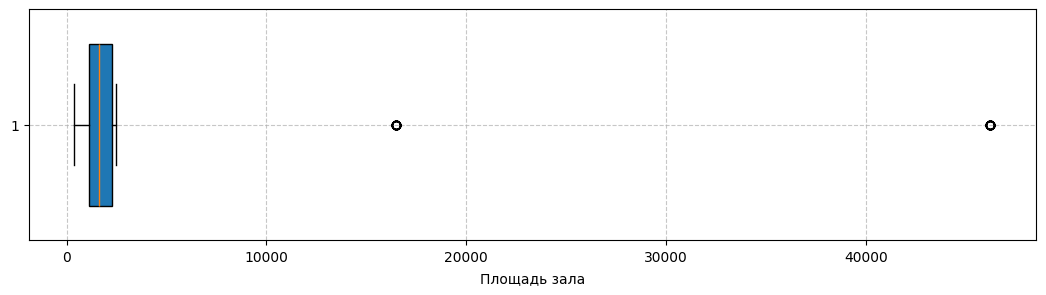

In [105]:
plt.figure(figsize=(13, 3))
plt.boxplot(result_df['площадь_зала'], 
            patch_artist=True, 
            vert=False,
            widths=0.7)
plt.xlabel('Площадь зала', labelpad=5)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

**Шаг 12. Найдем топ 3 уникальных максимальных значений в колонке result_df['площадь_зала'], где было обнаружено аномальное значение:**

In [106]:
unique_values = np.sort(result_df['площадь_зала'].unique())[-3:][::-1]

In [107]:
unique_values

array([46230.61, 16493.64,  2454.92])

Заметим, что лишь 2 уникальных значения привышают 2500. Выделим их с помощью среза в отдельный массив:

In [108]:
values_to_remove  = unique_values[:2]

In [109]:
values_to_remove

array([46230.61, 16493.64])

Удалим из result_df те строки, где колонка result_df['площадь_зала'] равна значениям из массива values_to_remove.

In [110]:
result_df = result_df.query("площадь_зала not in @values_to_remove")

Убедимся теперь, что аномальные значения (которые больше 2500) в колонке result_df['площадь_зала'] отсутствуют.

In [111]:
result_df['площадь_зала'].max()

np.float64(2454.92)

Для наглядности ещё раз выведем boxplot и убедимся, что выбросы устранены.

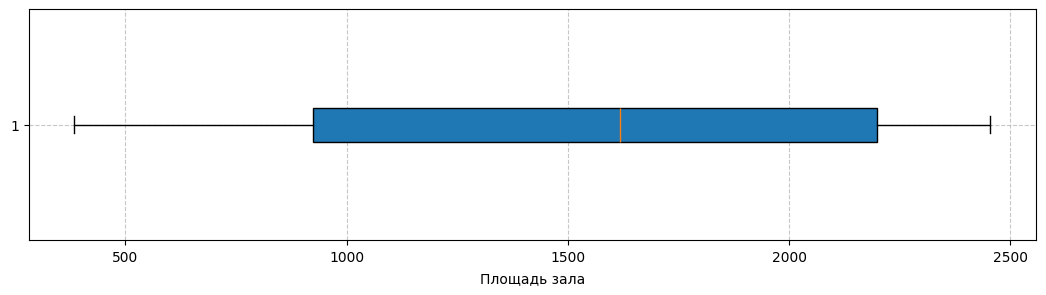

In [112]:
plt.figure(figsize=(13, 3))
plt.boxplot(result_df['площадь_зала'], 
            patch_artist=True, 
            vert=False)
plt.xlabel('Площадь зала', labelpad=5)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

**Шаг 13. Выведем города с общим количеством произведенной продукции и долей брака:**

In [113]:
gr_df1 = result_df.groupby('город')[['количество_произведено', 'количество_брака']].sum().sort_values('количество_произведено')

Добавим также колонку с долей брака по каждому городу:

In [114]:
gr_df1['% брака'] = (100 * gr_df1['количество_брака']/gr_df1['количество_произведено']).round(2)

In [115]:
gr_df1 = gr_df1.reset_index()

In [116]:
gr_df1

,город,количество_произведено,количество_брака,% брака
0,Челябинск,88559,3073,3.47
1,Новосибирск,186350,9436,5.06
2,Омск,194630,7992,4.11
3,Москва,213711,9845,4.61
4,Казань,288560,13636,4.73
5,Самара,332975,18074,5.43
6,Ростов-на-Дону,369857,14047,3.80
7,Екатеринбург,381566,14434,3.78
8,Санкт-Петербург,494236,23408,4.74
9,Нижний Новгород,566979,22899,4.04


Добавим визуализацию в виде столбчатой диаграммы (barh):

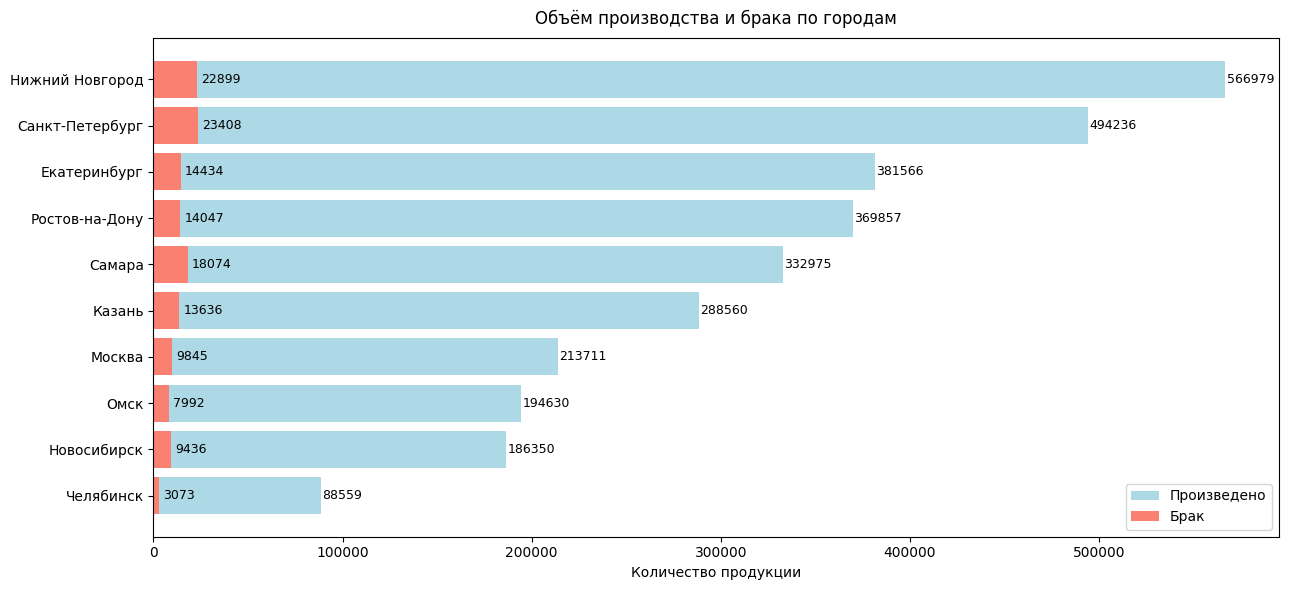

In [117]:
gr_df1 = gr_df1.sort_values('количество_произведено', ascending=True)
plt.figure(figsize=(13, 6))
ax1 = plt.barh(gr_df1['город'], gr_df1['количество_произведено'], color='lightblue', label='Произведено')
ax2 = plt.barh(gr_df1['город'], gr_df1['количество_брака'], color='salmon', label='Брак')

plt.bar_label(ax1, fontsize=9, padding=1)
plt.bar_label(ax2, padding=3, fontsize=9)

plt.xlabel('Количество продукции', fontsize=10)
plt.title('Объём производства и брака по городам', fontsize=12, pad=10)
plt.legend()
plt.tight_layout()
plt.show()

Наибольшая доля брака среди всех городов: 

In [118]:
gr_df1[gr_df1['% брака'] == gr_df1['% брака'].max()]

,город,количество_произведено,количество_брака,% брака
5,Самара,332975,18074,5.43


Наименьшая доля брака среди всех городов: 

In [119]:
gr_df1[gr_df1['% брака'] == gr_df1['% брака'].min()]

,город,количество_произведено,количество_брака,% брака
0,Челябинск,88559,3073,3.47


Выводы по данной группировке (gr_df1):
- Наибольшее количество продукции производится в Нижнем Новгороде, а наименьшее в Челябинске.
- Наибольшее количество брака в долях от общего количества продукции в Самаре, а наименьшее в Челябинске.

**Шаг 14. Посчитаем общее количество продукта в каждой категории и количество брака по всем цехам вместе взятым. Для удобства сбросим мультииндексы и отсортируем полученный список по убыванию количества продукции:**

In [120]:
gr_df2 = result_df.groupby('наименование_продукта').agg({
    'количество_произведено': 'sum',
    'количество_брака': 'sum'
}).reset_index().sort_values('количество_произведено', ascending=False)

Добавим также колонку с долей брака по каждому продукту:

In [121]:
gr_df2['% брака'] = (100 * gr_df2['количество_брака']/gr_df2['количество_произведено']).round(2)

In [122]:
gr_df2

,наименование_продукта,количество_произведено,количество_брака,% брака
15,Продукт_23,150053,6658,4.44
0,Продукт_1,131223,4866,3.71
18,Продукт_26,125289,4983,3.98
26,Продукт_6,123641,5510,4.46
23,Продукт_30,121939,6241,5.12
17,Продукт_25,121287,4094,3.38
24,Продукт_4,119093,4869,4.09
10,Продукт_19,114890,4937,4.30
27,Продукт_7,113965,5283,4.64
9,Продукт_18,112262,5688,5.07


Добавим визуализацию в виде столбчатой диаграммы (barh):

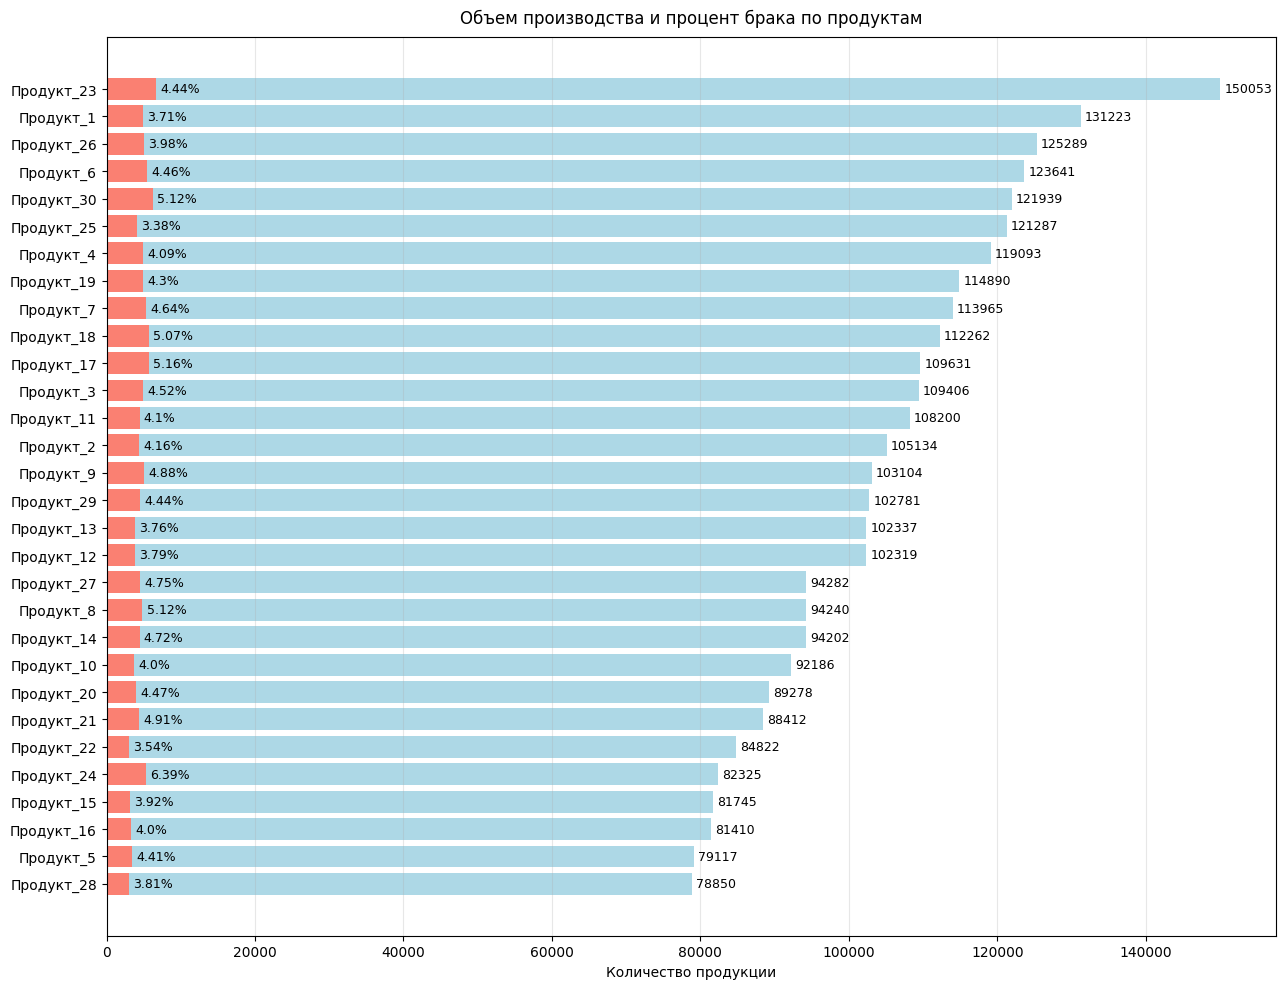

In [123]:
plt.figure(figsize=(13, 10))
ax1 = plt.barh(gr_df2['наименование_продукта'], gr_df2['количество_произведено'], color='lightblue')
ax2 = plt.barh(gr_df2['наименование_продукта'], gr_df2['количество_брака'], color='salmon')
plt.bar_label(ax1, padding=3, fontsize=9)
plt.bar_label(ax2, labels=[f'{x}%' for x in gr_df2['% брака']], padding=3, fontsize=9)

plt.xlabel('Количество продукции', fontsize=10)
plt.title('Объем производства и процент брака по продуктам', pad=10, fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Наибольшая доля брака среди всех продуктов: 

In [124]:
gr_df2[gr_df2['% брака'] == gr_df2['% брака'].max()]

,наименование_продукта,количество_произведено,количество_брака,% брака
16,Продукт_24,82325,5261,6.39


Наименьшая доля брака среди всех продуктов: 

In [125]:
gr_df2[gr_df2['% брака'] == gr_df2['% брака'].min()]

,наименование_продукта,количество_произведено,количество_брака,% брака
17,Продукт_25,121287,4094,3.38


Выводы по данной группировке (gr_df2):
- Наибольшее количество производимого продукта у - Продукт_23, а наименьшее у - Продукт_28.
- Наибольшая доля брака у - Продукт_24, а наименьшая у - Продукт_25.

**Шаг 15. Посчитаем общее количество произведённого продукта, брака и долю брака по каждому цеху. Для удобства сбросим мультииндексы и отсортируем полученный список по убыванию количества продукции:**

In [126]:
gr_df3 = result_df.groupby('id_цеха').agg({
    'количество_произведено': 'sum',
    'количество_брака': 'sum'
}).reset_index().sort_values('количество_произведено', ascending=False)

Добавим также колонку с долей брака по каждому цеху:

In [127]:
gr_df3['% брака'] = (100 * gr_df3['количество_брака']/gr_df3['количество_произведено']).round(2)

In [128]:
gr_df3

,id_цеха,количество_произведено,количество_брака,% брака
28,134,98504,4096,4.16
42,149,97732,4712,4.82
0,100,95989,3456,3.60
41,148,95032,3272,3.44
31,137,94740,3665,3.87
3,103,94272,4859,5.15
4,104,92100,2835,3.08
40,147,91896,2022,2.20
27,133,88559,3073,3.47
23,128,87892,4663,5.31


Визуализируем результаты в виде тепловой карты. Отсортируем цеха в порядке возрастания процента брака и выведем результаты.

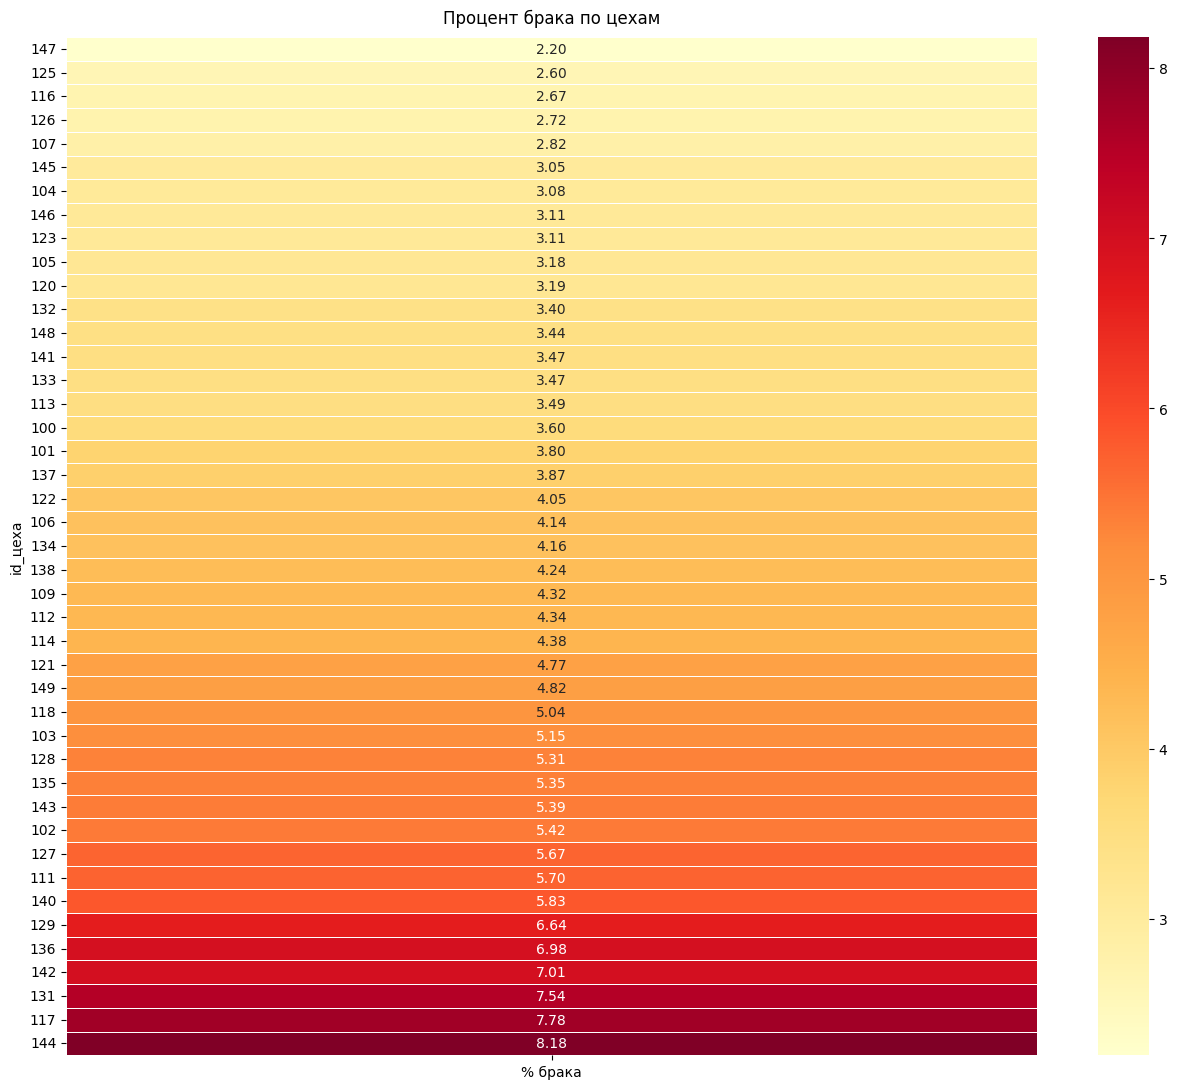

In [129]:
plt.figure(figsize=(13, 11))
sns.heatmap(gr_df3.set_index('id_цеха')[['% брака']].sort_values('% брака'),
           annot=True, fmt='.2f', cmap='YlOrRd', linewidths=0.5)
plt.title('Процент брака по цехам', pad=10, fontsize=12)
plt.tight_layout()
plt.show()

Наибольшая доля брака среди всех цехов: 

In [130]:
gr_df3[gr_df3['% брака'] == gr_df3['% брака'].max()]

,id_цеха,количество_произведено,количество_брака,% брака
37,144,70537,5773,8.18


Наименьшая доля брака среди всех цехов: 

In [131]:
gr_df3[gr_df3['% брака'] == gr_df3['% брака'].min()]

,id_цеха,количество_произведено,количество_брака,% брака
40,147,91896,2022,2.2


Выводы по данной группировке (gr_df3):
- Наибольшее количество продукта произведено в цехе 134, а наименьшее в цехе 118.
- Наибольшая доля брака у цеха 144, а наименьшая у цеха 147.

**Шаг 16. Корреляционный анализ:**

In [132]:
corr_matrix = result_df[['количество_сотрудников', 
                'площадь_зала', 
                'температура_зала', 
                'количество_произведено', 
                'количество_брака']].corr()

In [133]:
corr_matrix

,количество_сотрудников,площадь_зала,температура_зала,количество_произведено,количество_брака
количество_сотрудников,1.000000,0.001628,0.064015,-0.023894,0.014704
площадь_зала,0.001628,1.000000,-0.174884,-0.022393,-0.045526
температура_зала,0.064015,-0.174884,1.000000,-0.026006,0.348446
количество_произведено,-0.023894,-0.022393,-0.026006,1.000000,0.325499
количество_брака,0.014704,-0.045526,0.348446,0.325499,1.000000


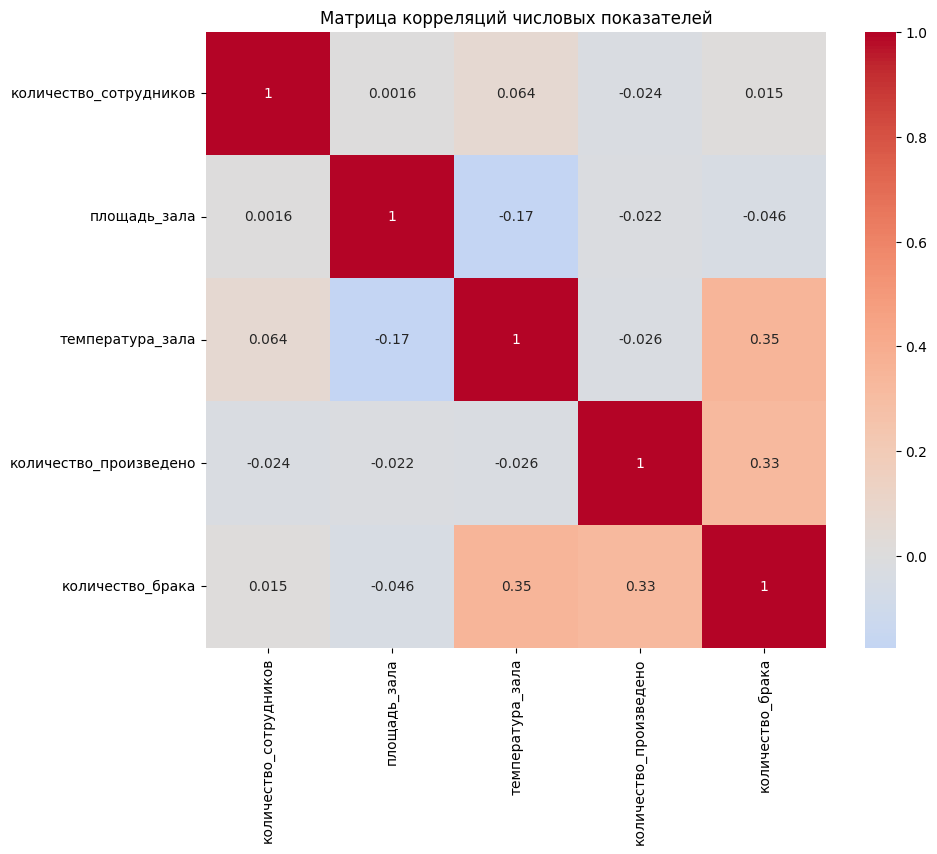

In [134]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых показателей')
plt.show()

Выводы и рекомендации:

- Существует слабая положительная связь между температурой производственного зала и количеством брака. Рост температуры зала приводит к росту количества брака. Рекомендуется проверить причинно-следственную связь: от плохого сырья до перегрева станков.
- Кроме того, наблюдается слабая положительная связь между количеством производимой продукции и количеством брака. Стоит провести оценку нагрузки.